In [17]:
import requests
import certifi

response = requests.get(
    "https://raw.githubusercontent.com/kyuyounglee-20250607/python-study-git/main/seoul_store.csv",
    verify=certifi.where()
)

In [19]:
pip install certifi --upgrade

  Using cached certifi-2025.10.5-py3-none-any.whl.metadata (2.5 kB)
Using cached certifi-2025.10.5-py3-none-any.whl (163 kB)
  Attempting uninstall: certifi
    Found existing installation: certifi 2025.8.3
    Uninstalling certifi-2025.8.3:
      Successfully uninstalled certifi-2025.8.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/kyuyounglee-20250607/python-study-git/main/seoul_store.csv'
df = pd.read_csv(url,encoding='cp949')
df.head()

,기준_년분기_코드,서울시_코드,서울시_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,...,시간대_17~21_매출_건수,시간대_21~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20243,11,서울시,CS200005,스포츠 강습,1.256220e+11,560552.0,1.148398e+11,1.078224e+10,3.065966e+10,...,230966.0,59087.0,248918.0,300209.0,10499.0,73887.0,124032.0,237206.0,76375.0,27131.0
1,20243,11,서울시,CS200034,여관,6.684655e+10,1268476.0,4.588294e+10,2.096361e+10,9.835197e+09,...,354669.0,258571.0,869820.0,322857.0,18482.0,385561.0,328263.0,180558.0,170101.0,109699.0
2,20243,11,서울시,CS200036,고시원,2.194135e+08,429.0,1.568745e+08,6.253908e+07,5.600508e+07,...,73.0,185.0,219.0,210.0,0.0,218.0,115.0,0.0,96.0,0.0
3,20243,11,서울시,CS300002,편의점,1.131581e+12,165985978.0,8.347921e+11,2.967892e+11,1.723568e+11,...,42140217.0,25755768.0,100792950.0,63123710.0,3546395.0,37103083.0,46749462.0,33300287.0,28146842.0,15070636.0
4,20243,11,서울시,CS300010,반찬가게,8.342301e+11,32501744.0,6.961403e+11,1.380897e+11,1.574815e+11,...,5866680.0,1246877.0,15357807.0,14937766.0,190358.0,3896771.0,7095865.0,6157793.0,6326482.0,6628285.0


In [2]:
%pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns  # matplotlib 를 감싼 wrapper 클래스
top10 = df.groupby('서비스_업종_코드_명')['당월_매출_금액'].sum().nlargest(10)
top10 = top10.to_frame()
top10 = top10.reset_index()
top10

Matplotlib is building the font cache; this may take a moment.


,서비스_업종_코드_명,당월_매출_금액
0,한식음식점,4.760544e+13
1,일반의류,2.712249e+13
2,일반의원,2.306484e+13
3,의약품,2.127049e+13
4,편의점,1.773642e+13
5,슈퍼마켓,1.705082e+13
6,컴퓨터및주변장치판매,1.629611e+13
7,수산물판매,1.596464e+13
8,육류판매,1.264747e+13
9,청과상,1.179958e+13


In [16]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Apple SD Gothic Neo'  # Windows용 한글 폰트
matplotlib.rcParams['axes.unicode_minus'] = False     # 음수 부호 깨짐 방지

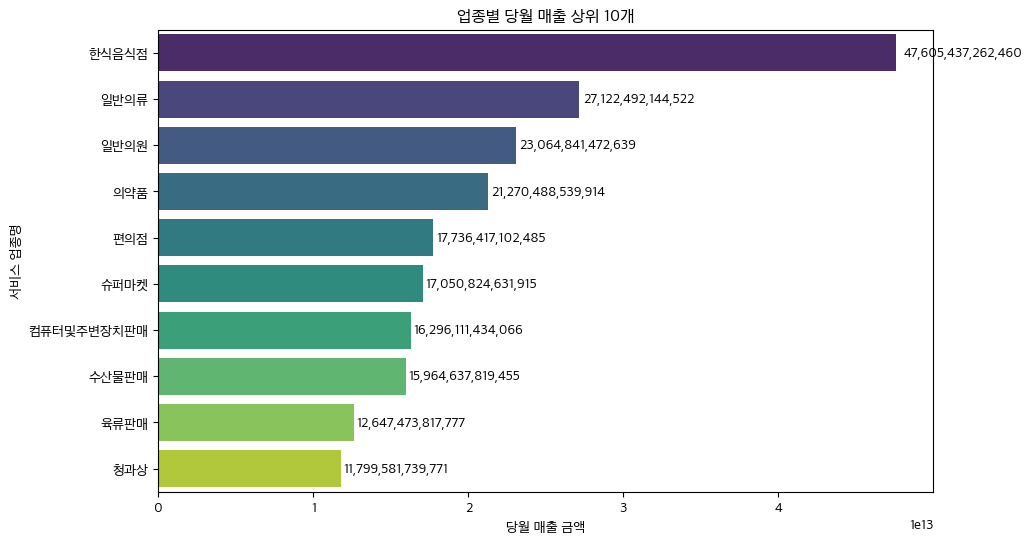

In [17]:
plt.figure(figsize=(10,6))  # 그래프의 전체 크기를 설정
sns.barplot(data=top10,y = '서비스_업종_코드_명',x='당월_매출_금액', palette='viridis',hue='서비스_업종_코드_명')
plt.title('업종별 당월 매출 상위 10개')

# 막대 위 값 표시
for i, v in enumerate(top10['당월_매출_금액']):
    plt.text(v + v*0.01, i, f'{v:,.0f}', va='center', fontsize=10) 

plt.xlabel('당월 매출 금액')
plt.ylabel('서비스 업종명')
plt.show()

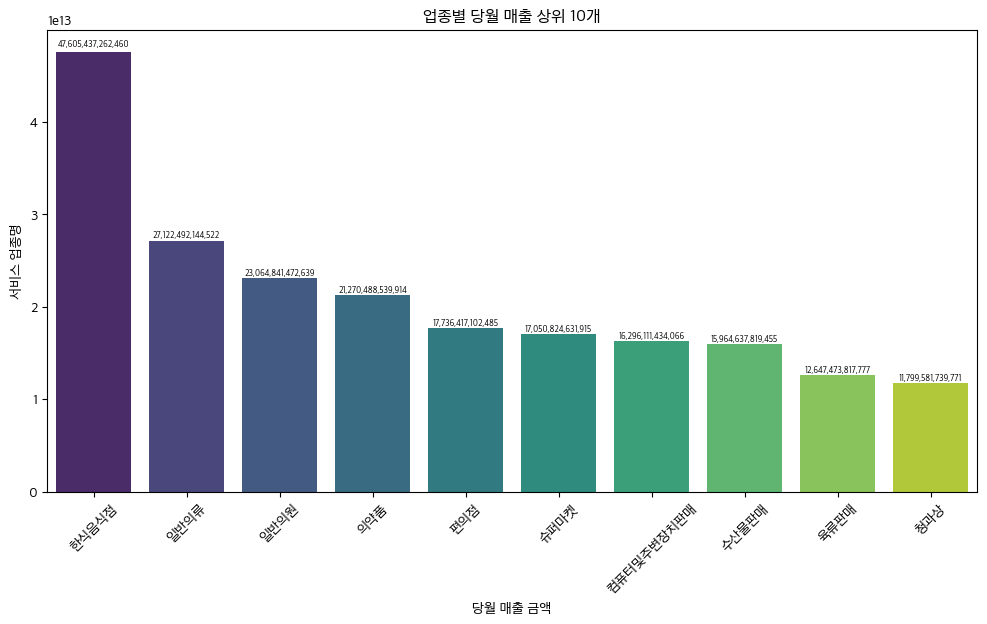

In [18]:
plt.figure(figsize=(12,6))  # 그래프의 전체 크기를 설정
sns.barplot(data=top10,x = '서비스_업종_코드_명',y='당월_매출_금액', palette='viridis',hue='서비스_업종_코드_명')
plt.title('업종별 당월 매출 상위 10개')

# 막대 위 값 표시
for i, v in enumerate(top10['당월_매출_금액']):
    plt.text(i, v + v*0.01, f'{v:,.0f}', ha='center', va='bottom', fontsize=6)

plt.xticks(rotation=45)
plt.xlabel('당월 매출 금액')
plt.ylabel('서비스 업종명')
plt.show()

In [19]:
top10.head()

,서비스_업종_코드_명,당월_매출_금액
0,한식음식점,4.760544e+13
1,일반의류,2.712249e+13
2,일반의원,2.306484e+13
3,의약품,2.127049e+13
4,편의점,1.773642e+13
